In [134]:
#### specify path of Julia Code for 2D Models ####
### By default the working directory ./2D_Models ###
path = string( pwd(), "/2D_Models/")

"/home/jakob/Dokumente/Repositories/Modeling_Framework/2D_Models/"

In [135]:
##### include 2D Modelling Framework ####
include(string(path, "./2D_model_library.jl"));


########## OPERATIONAL ##########
##### how to chose the actual velocity? #####

#op_model = "Constant"
#op_model = "Collision_Free_Speed"
#op_model = "RVO"
#op_model = "SocialForce"
#op_model = "AV_Model"
#op_model = "AV_IN_Model"
op_model = "PowerLaw"
#op_model = "IN_Costfunction"
#op_model = "IN_Model"

include_op_model(op_model, path)

########## TACTICAL ##########
#### how to chose the preferred velocity? ###

tact_model = "Constant"
#tact_model = "IN_Model"

include_tact_model(tact_model, path)


########## STRATEGIC ##########
### how to chose the desired velocity ###

#strat_model = "Constant"
#strat_model = "Towards_Goal"
strat_model = "Two_Goals"


include_strat_model(strat_model, path)


########## OPTIMIZATION SCHEME ##########
### If optimization of a cost-function is included, how to solve? ###

#optimization_scheme = "Regular_Sampling"
optimization_scheme = "Random_Sampling"

include_optimization_scheme(optimization_scheme, path)


##### which update scheme? #####

update = "Parallel_Update"
#update = "Step_Update"

include_update(update, path)


##### which order? i.e. Acceleration or Velocity based? ####
#order = "first"
order = "second"

include_order(order, path)


##### PERCEPTIONAL MODEL ####
perception_model = "None"
#perception_model = "Only_in_Front"

include_perception_model(perception_model, path)

WATCH OUT WHEN AGENTS REACH THE SECOND GOAL, THEY ARE DELETED
BUT IN THE OUTPUT THE AGENTS NOW DO NOT HAVE A CONSTANT ID!!!


In [174]:
### of the system ###
N = 2
system_size = (100.0, 100.0) #important for periodic boundaries
p = [1.5, 1.0, 2.0, 1.0, 0.3, 0.0, 0.0, 0.1, 1.0, 1.0, 0.0, 0.0, 0.5, 0.0]



### initialize geometry ###
geometrie = create_geometry_single_obstacle((37.5,31.5), 0.3)

### initialize crowd ###
menge = create_crowd(N, geometrie);
Init_Hom_Parameters!(p, menge)

a = menge.agent[1]
b = menge.agent[2];

a.τ_A = 0.5
b.vel = 1.0
b.heading = normalize((0.0, 1.0))
a.pos = (0.0, 0.0)

a.vel = 0.0
a.heading = normalize((-1.0, -1.0))
a.T = 2.0

a.l = 0.3
b.l = 0.3

a.α = 1.0
a.r = 1.0

Update_Neighborhood!(menge, geometrie, system_size, 5.0)

In [181]:
Effective_Distance(a::agent, b::agent) = 0.5*sqrt((d(a,b) + abs((a.pos.-b.pos).-v(b).*a.τ_A))^2-abs(v(b).*a.τ_A)^2)

Effective_Distance2(a::agent, b::agent) = 0.5*sqrt((d(a,b) + abs((a.pos.-b.pos).-(v(b).-v(a)).*a.τ_A))^2-abs((v(b).-v(a)).*a.τ_A)^2)

ϕ2(a::agent, b::agent) = a.α * a.r * exp(-Effective_Distance(a, b)/a.r)
ϕ(a::agent, b::agent) = a.α * a.r * exp(-Effective_Distance(a, b)/a.r)

ϕ (generic function with 2 methods)

In [196]:
space = collect(-1.0:0.005:1.0)
Potential = fill(0.0, length(space), length(space))


for (i, x) in enumerate(space)
       
    for (j, y) in enumerate(space)       
        
        b.pos = (x, y)
       
        Potential[j, i] =  min(a.T/0.05, AV(a, b, system_size))
            
    end
end

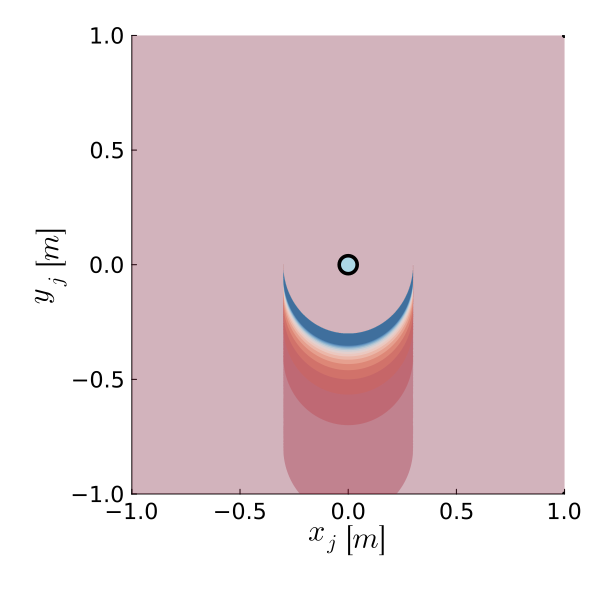

In [197]:
using Plots
using LaTeXStrings

Plots.scalefontsizes()
Plots.scalefontsizes(2)

plot(layout=(1,1), legend=:false, legendfontsize = 15, grid = false,
        xtickfontsize=15, ytickfontsize=15, xguidefontsize=20, yguidefontsize=20)

contour!(space, space, Potential, fill = true, color =:RdBu, label=false,
        linewidth = 0, alpha =0.3, legend = false)

scatter!(a.pos, markersize = 10,label =L"Pedestrian", color =:lightblue, msw = 3)

b_vel = b.vel .* b.heading
quiver!([1.0, 1.0], quiver = 0.5 .*([b_vel[1]], [b_vel[2]]), color =:black, linewidth=5, thickness_scaling = 1)


a_vel = a.vel .* a.heading
quiver!([-1.0, -1.0], quiver = 0.5 .*([a_vel[1]], [a_vel[2]]), color =:black, linewidth=5, thickness_scaling = 1)


plot!(xlabel=L"$x_j$ $[m]$")
plot!(ylabel=L"$y_j$ $[m]$")

plot!(xlims = [-1, 1])
plot!(ylims = [-1, 1])

plot!(size=(600,600), margin = 0.7Plots.cm)

In [187]:
Potential

41×41 Matrix{Float64}:
 0.002002  0.002002  0.002002  0.002002  …  0.002002  0.002002  0.002002
 0.002002  0.002002  0.002002  0.002002     0.002002  0.002002  0.002002
 0.002002  0.002002  0.002002  0.002002     0.002002  0.002002  0.002002
 0.002002  0.002002  0.002002  0.002002     0.002002  0.002002  0.002002
 0.002002  0.002002  0.002002  0.002002     0.002002  0.002002  0.002002
 0.002002  0.002002  0.002002  0.002002  …  0.002002  0.002002  0.002002
 0.002002  0.002002  0.002002  0.002002     0.002002  0.002002  0.002002
 0.002002  0.002002  0.002002  0.002002     0.002002  0.002002  0.002002
 0.002002  0.002002  0.002002  0.002002     0.002002  0.002002  0.002002
 0.002002  0.002002  0.002002  0.002002     0.002002  0.002002  0.002002
 0.002002  0.002002  0.002002  0.002002  …  0.002002  0.002002  0.002002
 0.002002  0.002002  0.002002  0.002002     0.002002  0.002002  0.002002
 0.002002  0.002002  0.002002  0.002002     0.002002  0.002002  0.002002
 ⋮                          